# Model Testing
## Using Neural Networks

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

2025-04-09 04:02:31.758500: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-09 04:02:31.761488: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-09 04:02:31.770028: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744171351.784516   63260 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744171351.788659   63260 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1744171351.800293   63260 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [2]:
dataset = pd.read_csv("1.4.2.training_data.csv")  # Replace with your dataset path

In [3]:
print(dataset.columns)
dataset.columns = dataset.columns.str.strip()
print("Columns in dataset:", dataset.columns)
print(dataset.drop(columns=["time", "wind_spd_kmh", "gust_kmh"]))
print(dataset["wind_spd_kmh"])

Index(['time', 'air_temp', 'apparent_t', 'dewpt', 'rel_hum', 'delta_t',
       'wind_dir_deg', 'wind_spd_kmh', 'gust_kmh', 'rain_trace', 'rain_ten',
       'rain_hour', 'press', 'wet_bulb_temperature', 'gust-diff'],
      dtype='object')
Columns in dataset: Index(['time', 'air_temp', 'apparent_t', 'dewpt', 'rel_hum', 'delta_t',
       'wind_dir_deg', 'wind_spd_kmh', 'gust_kmh', 'rain_trace', 'rain_ten',
       'rain_hour', 'press', 'wet_bulb_temperature', 'gust-diff'],
      dtype='object')
       air_temp  apparent_t     dewpt  rel_hum   delta_t  wind_dir_deg  \
0      0.650558    0.497537  0.703704     0.59  0.274854      0.288889   
1      0.661710    0.583744  0.817460     0.75  0.163743      0.133333   
2      0.667286    0.623153  0.862434     0.82  0.111111      0.052778   
3      0.511152    0.275862  0.484127     0.54  0.245614      0.541667   
4      0.457249    0.209360  0.621693     0.93  0.023392      0.538889   
...         ...         ...       ...      ...       ...    

In [4]:
# Define neural network
model = Sequential(
    [
        Dense(30, activation="relu", input_shape=(11,)),
        Dense(30, activation="relu"),  # Hidden layer
        Dense(3, activation="linear"),  # Output layer for regression
    ]
)

# Alternative model definition
model_leaky = Sequential(
    [
        Dense(30, input_shape=(11,)),
        LeakyReLU(alpha=0.01),  # Leaky ReLU activation
        Dense(30),  # Hidden layerF
        LeakyReLU(alpha=0.01),  # Leaky ReLU activation
        Dense(3, activation="linear"),  # Output layer for regression
    ]
)

model_big = Sequential(
    [
        Dense(200, activation="relu", input_shape=(11,)),
        Dense(200, activation="relu"),  # Hidden layer
        Dense(3, activation="linear"),  # Output layer for regression
    ]
)

/usr/local/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-04-09 04:02:34.925352: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/usr/local/lib/python3.12/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [5]:
# set the seed for reproducibility
tf.random.set_seed(42)

# Compile the model
model.compile(optimizer="adam", loss="mse", metrics=["mae"])

# Compile the alternative model
model_leaky.compile(optimizer="adam", loss="mse", metrics=["mae"])

# Compile the bigger model
model_big.compile(optimizer="adam", loss="mse", metrics=["mae"])

# all columns except "wind_spd_kmh", "time", and "gust_kmh" are features
X = dataset.drop(
    columns=["time", "wind_spd_kmh", "gust_kmh", "wind_dir_deg"]
).to_numpy()

# wind_spd_kmh and gust_kmh are the target variables
y = dataset[["wind_spd_kmh", "gust_kmh", "wind_dir_deg"]].to_numpy()


early_stopping = EarlyStopping(
    monitor="val_loss", patience=5, restore_best_weights=True
)

# Split the dataset into training and testing set


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [6]:
# Train the model
model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=16,
    validation_split=0.2,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping],
)
if early_stopping.stopped_epoch > 0:
    print(f"Training stopped early at epoch {early_stopping.stopped_epoch + 1}")
else:
    print("Training completed without early stopping")

Epoch 1/50
552/552 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0772 - mae: 0.1816 - val_loss: 0.0233 - val_mae: 0.1028
Epoch 2/50
552/552 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0209 - mae: 0.0928 - val_loss: 0.0194 - val_mae: 0.0804
Epoch 3/50
552/552 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0187 - mae: 0.0790 - val_loss: 0.0185 - val_mae: 0.0729
Epoch 4/50
552/552 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0179 - mae: 0.0725 - val_loss: 0.0182 - val_mae: 0.0694
Epoch 5/50
552/552 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0176 - mae: 0.0694 - val_loss: 0.0181 - val_mae: 0.0674
Epoch 6/50
552/552 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0174 - mae: 0.0684 - val_loss: 0.0180 - val_mae: 0.0668
Epoch 7/50
552/552 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0173 - mae: 0.0676 - val_loss: 0.0179 - val_mae: 0.0659
Epoch 8/50
552/552 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0172 - mae: 0.0671 - val_loss: 0.0179 - val_mae: 0.0653
Epoch 9/50
552/552 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - lo

In [7]:
# Train the alternative model
model_leaky.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=16,
    validation_split=0.2,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping],
)
if early_stopping.stopped_epoch > 0:
    print(f"Training stopped early at epoch {early_stopping.stopped_epoch + 1}")
else:
    print("Training completed without early stopping")

Epoch 1/50
552/552 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0471 - mae: 0.1570 - val_loss: 0.0208 - val_mae: 0.0907
Epoch 2/50
552/552 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0195 - mae: 0.0841 - val_loss: 0.0188 - val_mae: 0.0765
Epoch 3/50
552/552 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0182 - mae: 0.0749 - val_loss: 0.0183 - val_mae: 0.0704
Epoch 4/50
552/552 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0176 - mae: 0.0687 - val_loss: 0.0182 - val_mae: 0.0717
Epoch 5/50
552/552 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0173 - mae: 0.0656 - val_loss: 0.0181 - val_mae: 0.0716
Epoch 6/50
552/552 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0171 - mae: 0.0644 - val_loss: 0.0181 - val_mae: 0.0720
Epoch 7/50
552/552 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0170 - mae: 0.0639 - val_loss: 0.0181 - val_mae: 0.0714
Epoch 8/50
552/552 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0170 - mae: 0.0638 - val_loss: 0.0180 - val_mae: 0.0700
Epoch 9/50
552/552 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - lo

In [8]:
model_big.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=16,
    validation_split=0.2,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping],
)
if early_stopping.stopped_epoch > 0:
    print(f"Training stopped early at epoch {early_stopping.stopped_epoch + 1}")
else:
    print("Training completed without early stopping")

Epoch 1/50
552/552 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0298 - mae: 0.1125 - val_loss: 0.0190 - val_mae: 0.0691
Epoch 2/50
552/552 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0179 - mae: 0.0697 - val_loss: 0.0185 - val_mae: 0.0669
Epoch 3/50
552/552 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0174 - mae: 0.0678 - val_loss: 0.0183 - val_mae: 0.0699
Epoch 4/50
552/552 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0171 - mae: 0.0676 - val_loss: 0.0183 - val_mae: 0.0712
Epoch 5/50
552/552 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0169 - mae: 0.0672 - val_loss: 0.0182 - val_mae: 0.0727
Epoch 6/50
552/552 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0167 - mae: 0.0669 - val_loss: 0.0179 - val_mae: 0.0712
Epoch 7/50
552/552 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0165 - mae: 0.0667 - val_loss: 0.0175 - val_mae: 0.0666
Epoch 8/50
552/552 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0164 - mae: 0.0667 - val_loss: 0.0173 - val_mae: 0.0637
Epoch 9/50
552/552 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - lo

In [9]:
# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.5f}, Test MAE: {mae:.5f}")

# Evaluate the alternative model
loss_leaky, mae_leaky = model_leaky.evaluate(X_test, y_test)
print(f"Test Loss: {loss_leaky:.5f}, Test MAE: {mae_leaky:.5f}")

# Evaluate the bigger model
loss_big, mae_big = model_big.evaluate(X_test, y_test)
print(f"Test Loss: {loss_big:.5f}, Test MAE: {mae_big:.5f}")


69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0180 - mae: 0.0696  
Test Loss: 0.01653, Test MAE: 0.06715
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0172 - mae: 0.0615  
Test Loss: 0.01554, Test MAE: 0.05883
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0173 - mae: 0.0623  
Test Loss: 0.01589, Test MAE: 0.06005


In [10]:
# which columns are most important
importances = model.layers[0].get_weights()[0]
importances = np.abs(importances).sum(axis=1)
indices = np.argsort(importances)[::-1]

# Extract feature names from the dataset
feature_names = dataset.drop(
    columns=["time", "wind_spd_kmh", "gust_kmh", "wind_dir_deg"]
).columns

print("Feature ranking:")
for i in range(X.shape[1]):
    print(f"{i + 1}. {feature_names[indices[i]]} ({importances[indices[i]]})")

# print the model structure and weights

model.summary()

Feature ranking:
1. gust-diff (9.838062286376953)
2. apparent_t (9.267180442810059)
3. wet_bulb_temperature (7.543561935424805)
4. delta_t (7.415367126464844)
5. rain_trace (6.964934349060059)
6. rain_hour (6.821704387664795)
7. press (5.431790828704834)
8. rain_ten (5.408902645111084)
9. dewpt (5.337048530578613)
10. rel_hum (5.272872447967529)
11. air_temp (5.121740818023682)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 30)             │           360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            93 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,151 (16.22 KB)

 Trainable params: 1,383 (5.40 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,768 (10.82 KB)

In [11]:
importances_leaky = model_leaky.layers[0].get_weights()[0]
importances_leaky = np.abs(importances_leaky).sum(axis=1)
indices_leaky = np.argsort(importances_leaky)[::-1]

# Extract feature names from the dataset
feature_names_leaky = dataset.drop(
    columns=["time", "wind_spd_kmh", "gust_kmh", "wind_dir_deg"]
).columns
print("Feature ranking for Leaky ReLU:")
for i in range(X.shape[1]):
    print(
        f"{i + 1}. {feature_names_leaky[indices_leaky[i]]} ({importances_leaky[indices_leaky[i]]})"
    )

# print the model structure and weights
model_leaky.summary()

Feature ranking for Leaky ReLU:
1. rain_trace (12.159765243530273)
2. rain_hour (11.761818885803223)
3. gust-diff (11.194272994995117)
4. apparent_t (10.927526473999023)
5. wet_bulb_temperature (7.9141693115234375)
6. rain_ten (7.876949787139893)
7. delta_t (6.98048734664917)
8. air_temp (6.239712715148926)
9. rel_hum (6.222275733947754)
10. dewpt (6.082951545715332)
11. press (4.768725395202637)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 30)             │           360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │            93 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,151 (16.22 KB)

 Trainable params: 1,383 (5.40 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,768 (10.82 KB)

In [12]:
importances_big = model_big.layers[0].get_weights()[0]
importances_big = np.abs(importances_big).sum(axis=1)
indices_big = np.argsort(importances_big)[::-1]

# Extract feature names from the dataset
feature_names_big = dataset.drop(
    columns=["time", "wind_spd_kmh", "gust_kmh", "wind_dir_deg"]
).columns
print("Feature ranking for bigger model:")
for i in range(X.shape[1]):
    print(
        f"{i + 1}. {feature_names_big[indices_big[i]]} ({importances_big[indices_big[i]]})"
    )

# print the model structure and weights
model_big.summary()

Feature ranking for bigger model:
1. gust-diff (30.926773071289062)
2. rain_hour (29.293743133544922)
3. apparent_t (27.277687072753906)
4. rain_trace (25.896438598632812)
5. wet_bulb_temperature (21.5411376953125)
6. rain_ten (20.683685302734375)
7. delta_t (19.4332275390625)
8. rel_hum (18.419963836669922)
9. dewpt (18.309906005859375)
10. press (18.176210403442383)
11. air_temp (15.638824462890625)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 200)            │         2,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 200)            │        40,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 3)              │           603 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 129,611 (506.30 KB)

 Trainable params: 43,203 (168.76 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 86,408 (337.54 KB)

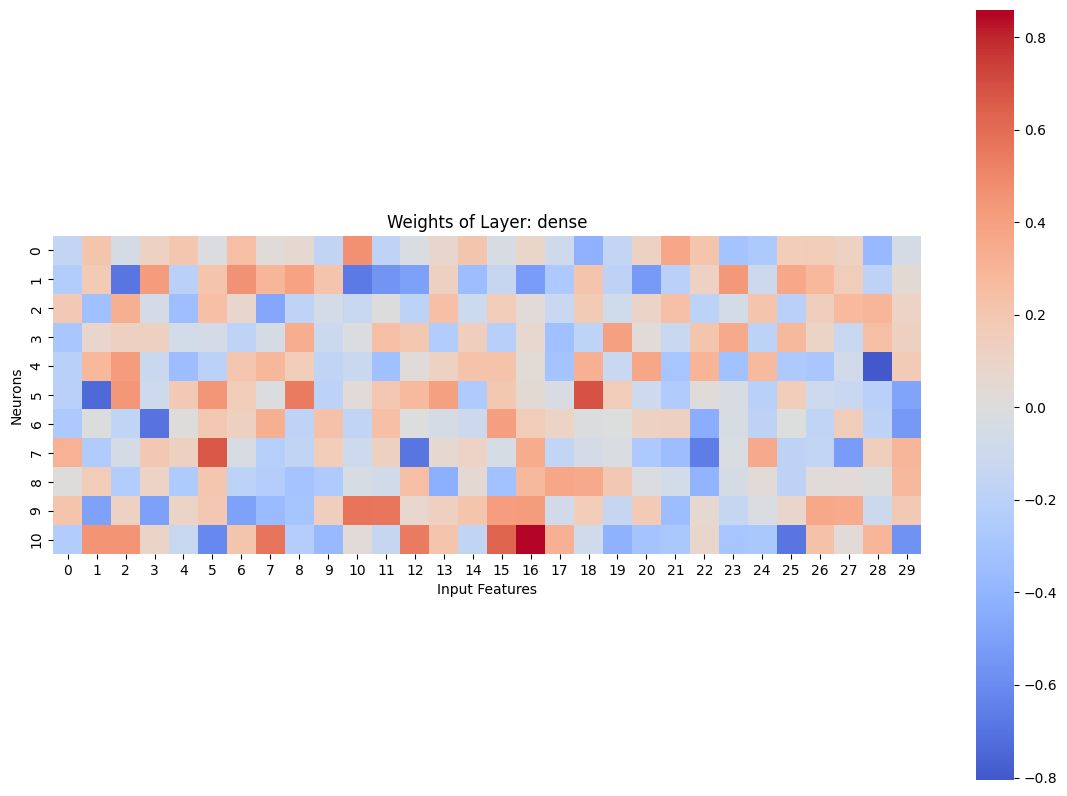

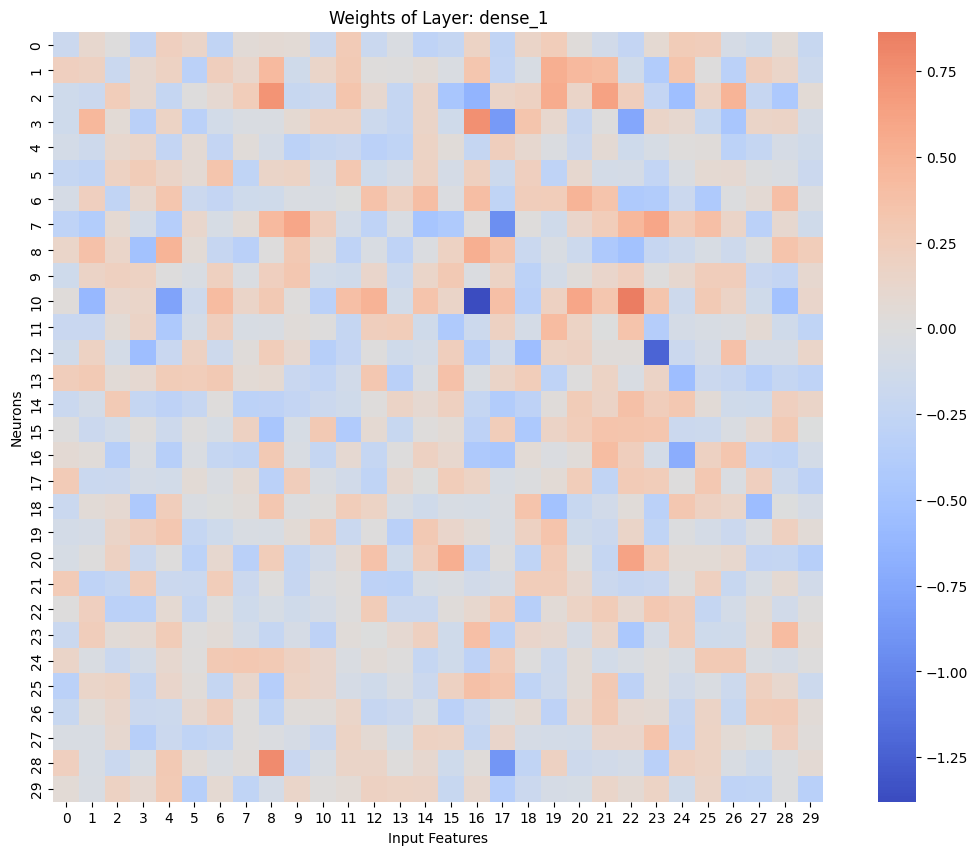

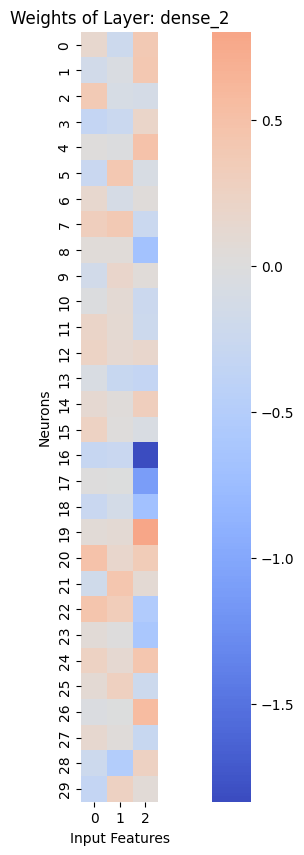

In [13]:
# visualise the model's individual neurons and weights
import matplotlib.pyplot as plt
import seaborn as sns


def plot_neuron_weights(model):
    for layer in model.layers:
        if isinstance(layer, Dense):
            weights = layer.get_weights()[0]

            plt.figure(figsize=(14, 10))
            sns.heatmap(
                weights, annot=False, cmap="coolwarm", cbar=True, center=0, square=True
            )
            plt.title(f"Weights of Layer: {layer.name}")
            plt.xlabel("Input Features")
            plt.ylabel("Neurons")
            plt.show()


plot_neuron_weights(model)

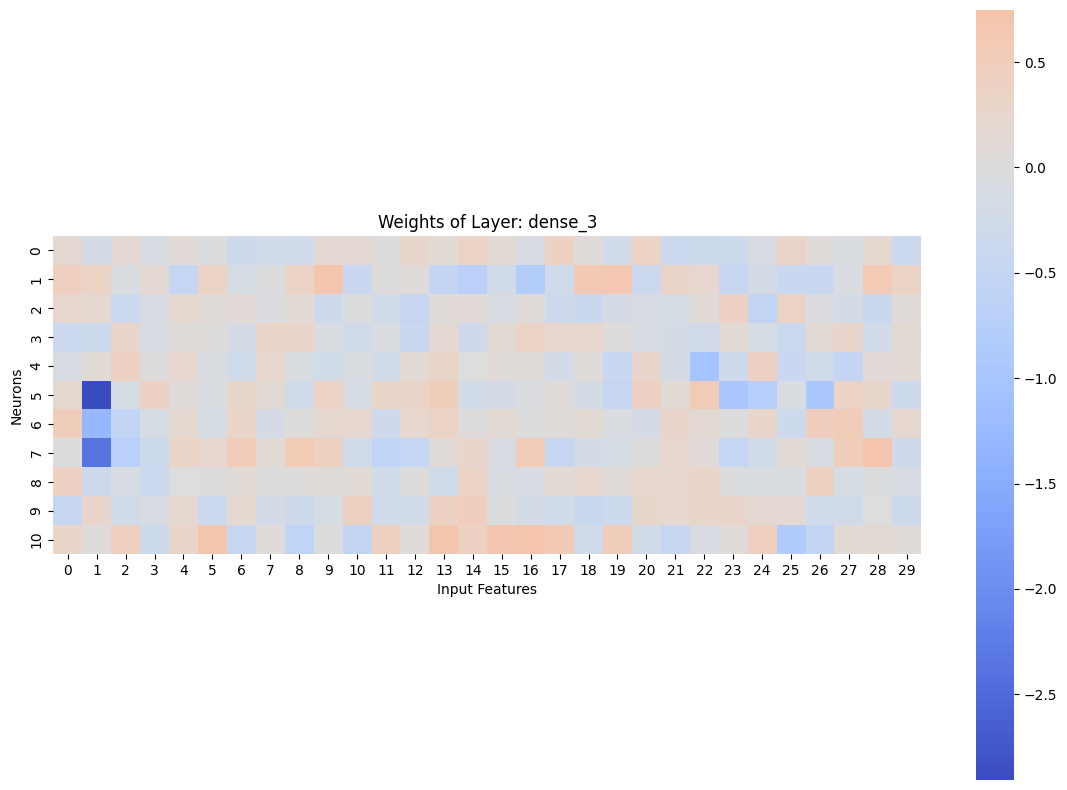

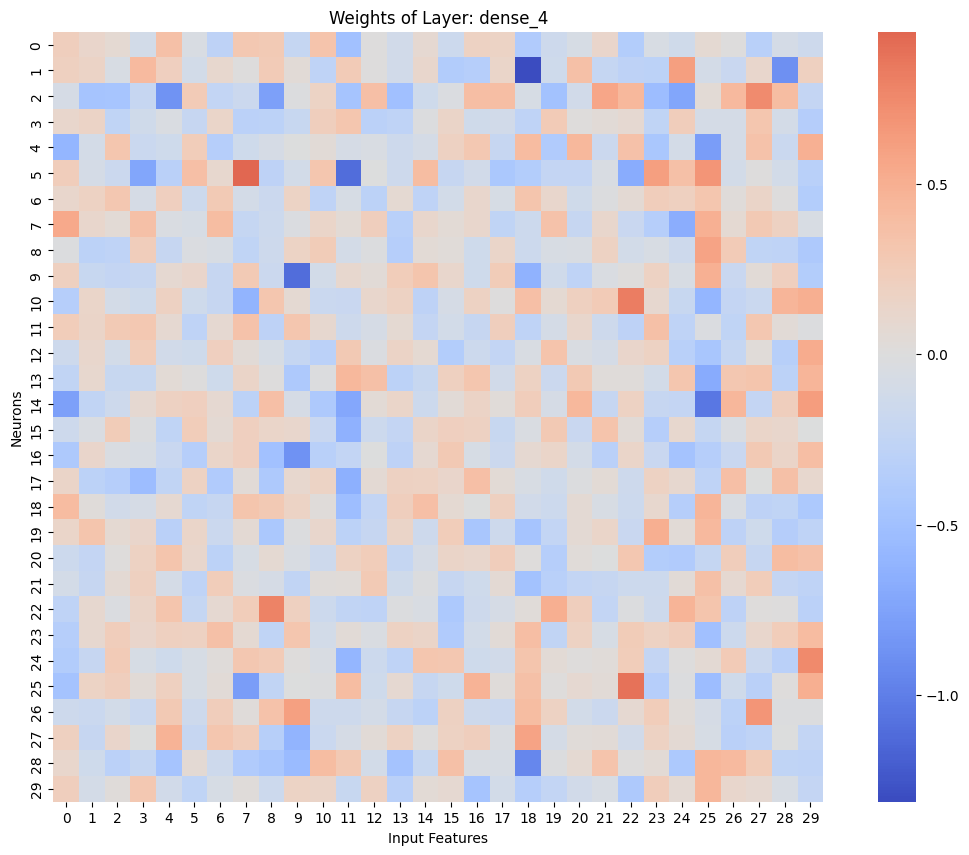

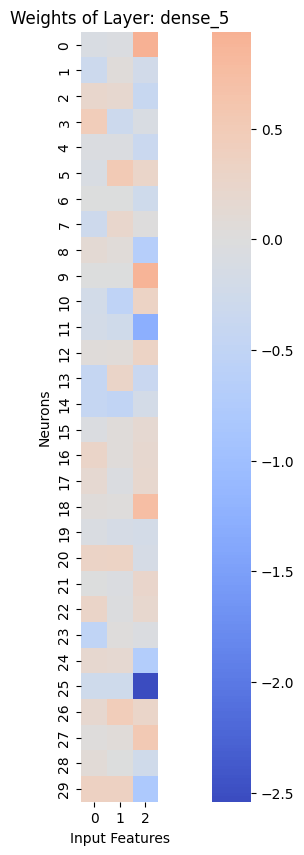

In [14]:
plot_neuron_weights(model_leaky)

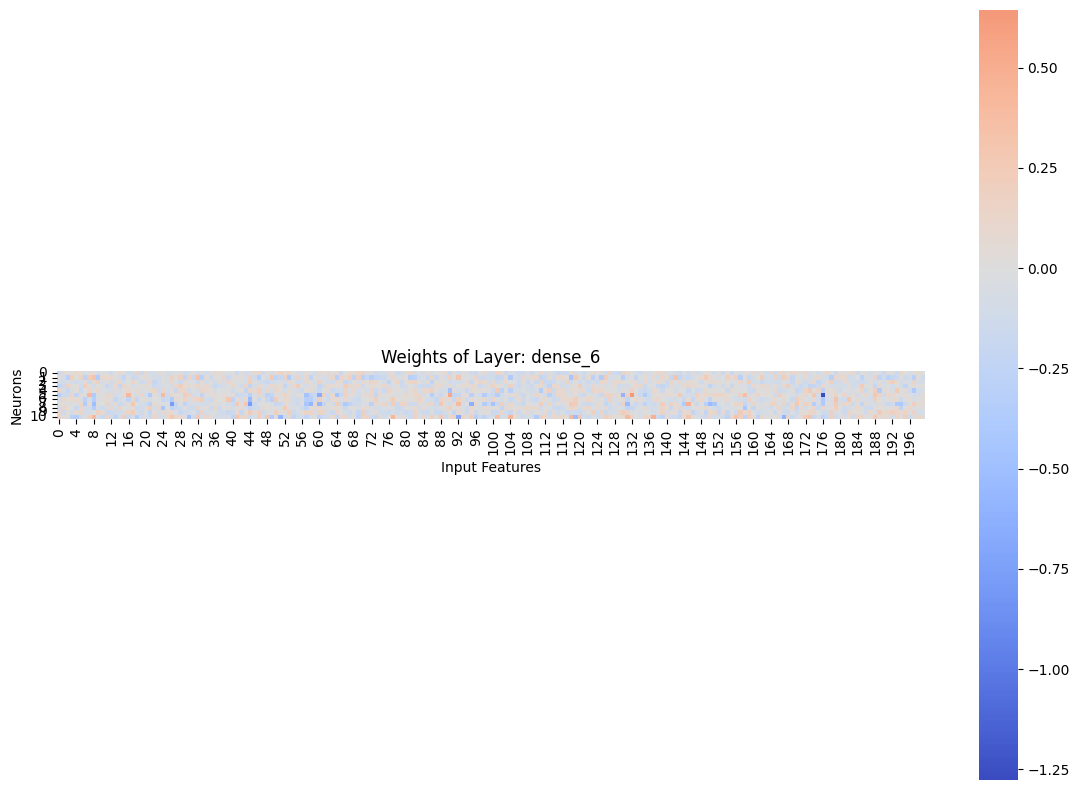

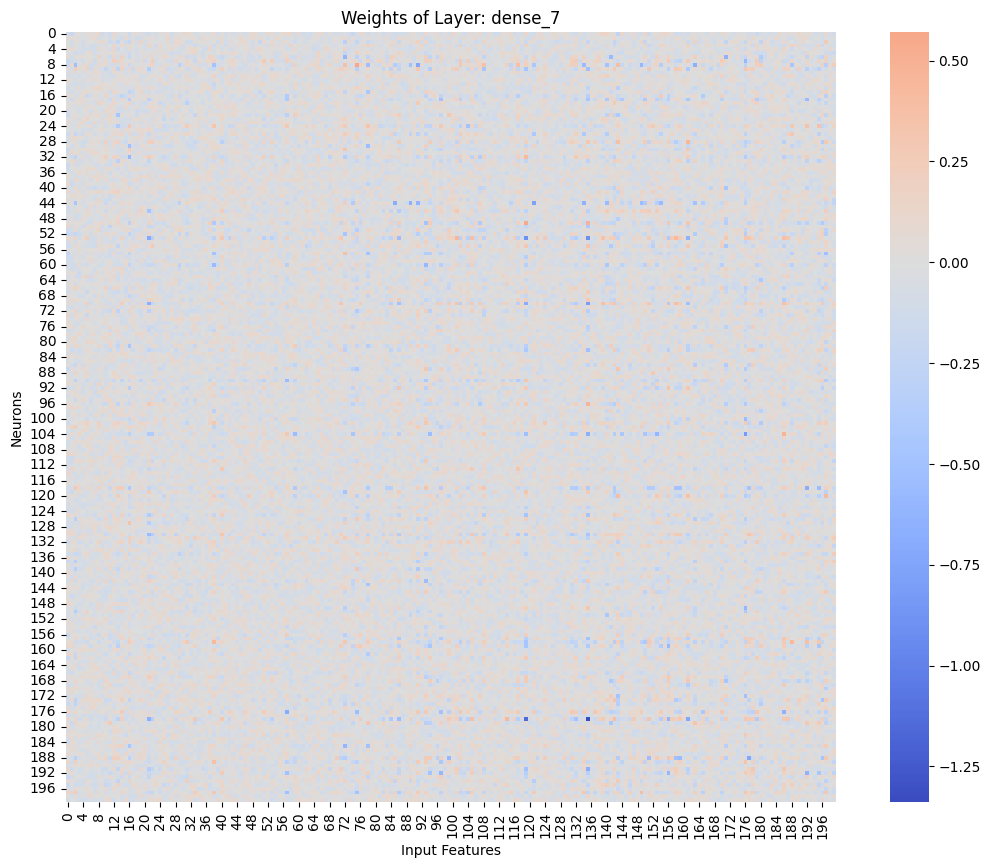

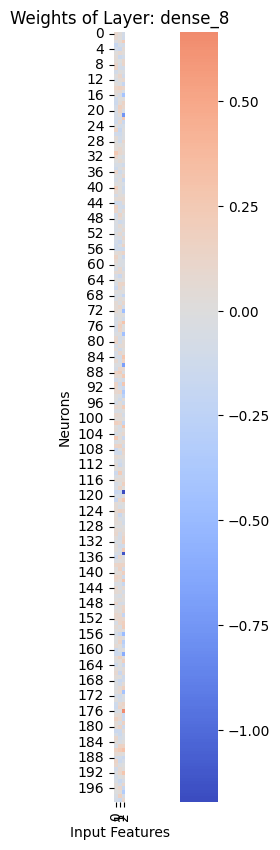

In [15]:
plot_neuron_weights(model_big)

In [16]:
# Save the models to a file
model.save("../1.5.Model_Testing_and_Validation/trained_model.keras")
model_leaky.save("../1.5.Model_Testing_and_Validation/trained_model_leaky.keras")
model_big.save("../1.5.Model_Testing_and_Validation/trained_model_big.keras")

print(
    f"""Model saved to:
    ../1.5.Model_Testing_and_Validation/trained_model.keras
    ../1.5.Model_Testing_and_Validation/trained_model_leaky.keras
    ../1.5.Model_Testing_and_Validation/trained_model_big.keras
    """
)

Model saved to:
    ../1.5.Model_Testing_and_Validation/trained_model.keras
    ../1.5.Model_Testing_and_Validation/trained_model_leaky.keras
    ../1.5.Model_Testing_and_Validation/trained_model_big.keras
    
